In [6]:
import matplotlib.pyplot as plt
import numpy as np
from cellpose import io, models, plot, train

io.logger_setup()

train_dir = '/Users/noah/Downloads/Finetune Augmentation/Training'
test_dir = '/Users/noah/Downloads/Finetune Augmentation/Validation'

2025-05-21 23:30:52,390 [INFO] WRITING LOG OUTPUT TO /Users/noah/.cellpose/run.log
2025-05-21 23:30:52,395 [INFO] 
cellpose version: 	4.0.2 
platform:       	darwin 
python version: 	3.12.9 
torch version:  	2.7.0


In [ ]:
output = io.load_train_test_data(train_dir, test_dir, image_filter="_img",
                                mask_filter="_cp_masks", look_one_level_down=False)
images, labels, image_names, test_images, test_labels, image_names_test = output

model = models.CellposeModel(gpu=True)

model_path, train_losses, test_losses = train.train_seg(model.net,
                            train_data=images, train_labels=labels,
                            test_data=test_images, test_labels=test_labels,
                            weight_decay=0.1, learning_rate=1e-5,
                            n_epochs=250, model_name="finetune augmentation",)

2025-05-21 23:30:52,408 [INFO] not all flows are present, running flow generation for all images
2025-05-21 23:30:52,796 [INFO] 63 / 63 images in /Users/noah/Downloads/Finetune Augmentation/Training folder have labels
2025-05-21 23:30:52,797 [INFO] not all flows are present, running flow generation for all images
2025-05-21 23:30:52,869 [INFO] 12 / 12 images in /Users/noah/Downloads/Finetune Augmentation/Validation folder have labels
2025-05-21 23:30:52,892 [INFO] ** TORCH MPS version installed and working. **
2025-05-21 23:30:52,893 [INFO] >>>> using GPU (MPS)
2025-05-21 23:31:25,751 [INFO] >>>> loading model /Users/noah/.cellpose/models/cpsam
2025-05-21 23:31:29,955 [INFO] computing flows for labels


100%|██████████| 63/63 [01:09<00:00,  1.11s/it]

2025-05-21 23:32:39,754 [INFO] computing flows for labels



100%|██████████| 12/12 [00:11<00:00,  1.00it/s]

2025-05-21 23:32:51,764 [INFO] >>> computing diameters



100%|██████████| 12/12 [00:00<00:00, 288.68it/s]

2025-05-21 23:32:52,034 [INFO] >>> normalizing {'lowhigh': None, 'percentile': None, 'normalize': True, 'norm3D': True, 'sharpen_radius': 0, 'smooth_radius': 0, 'tile_norm_blocksize': 0, 'tile_norm_smooth3D': 1, 'invert': False}


2025-05-21 23:32:54,912 [INFO] >>> n_epochs=250, n_train=63, n_test=12
2025-05-21 23:32:54,913 [INFO] >>> AdamW, learning_rate=0.00001, weight_decay=0.10000
2025-05-21 23:32:54,921 [INFO] >>> saving model to /Users/noah/Library/Mobile Documents/com~apple~CloudDocs/HvA/Master AAI/Afstuderen/Afstudeer Opdracht/finetune/models/finetune augmentation
2025-05-21 23:33:19,107 [INFO] 0, train_loss=1.9640, test_loss=2.5106, LR=0.000000, time 24.19s
2025-05-21 23:35:13,622 [INFO] 5, train_loss=1.6534, test_loss=1.6007, LR=0.000006, time 138.70s
2025-05-21 23:37:07,309 [INFO] 10, train_loss=1.3635, test_loss=1.1385, LR=0.000010, time 252.39s
2025-05-21 23:40:53,368 [INFO] 20, train_loss=1.3289, test_loss=0.9536, LR=0.000010, time 478.45s
2025-05-21 23:44:39,716 [INFO] 30, train_loss=1.2404, test_loss=0.9695, LR=0.000010, time 704.80s
2025-05-21 23:48:25,389 [INFO] 40, train_loss=1.1667, test_loss=1.0581, LR=0.000010, time 930.47s
2025-05-21 23:52:11,113 [INFO] 50, train_loss=1.2098, test_loss=1.0

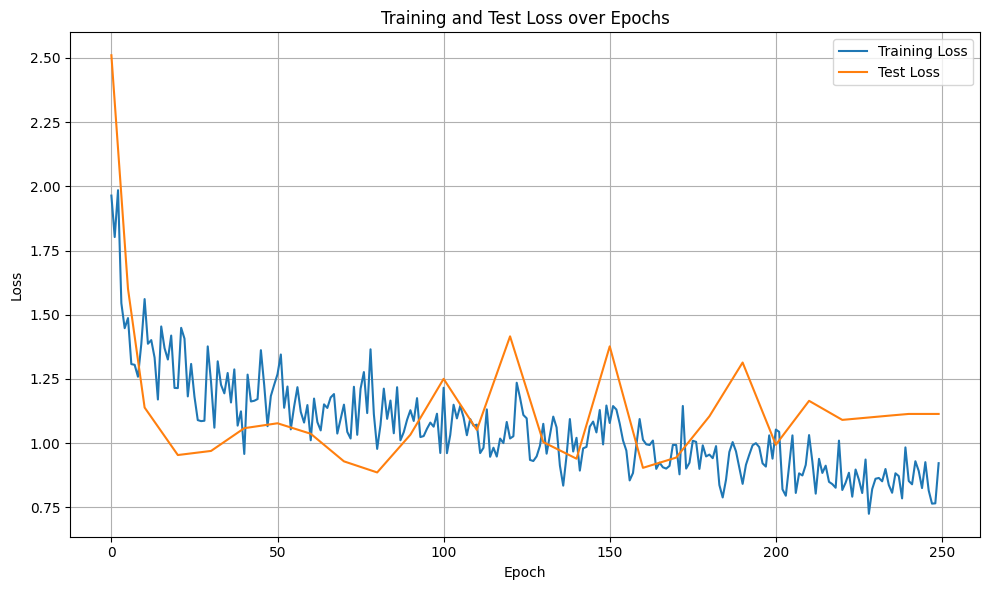

In [8]:
x = np.arange(len(test_losses))
mask = test_losses != 0
test_losses_interp = np.interp(x, x[mask], test_losses[mask])
test_losses_interp

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses_interp, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

2025-05-22 01:09:56,015 [INFO] ** TORCH MPS version installed and working. **
2025-05-22 01:09:56,016 [INFO] >>>> using GPU (MPS)
2025-05-22 01:09:59,261 [INFO] >>>> loading model models/finetune augmentation


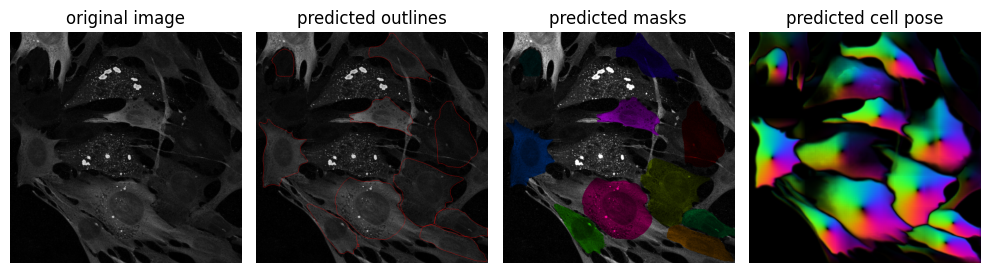

In [11]:
model = models.CellposeModel(pretrained_model="models/finetune augmentation",gpu=True)

img = io.imread('/Users/noah/Downloads/Finetune/Testing/15_img.tif')

masks, flows, styles = model.eval(img)

fig = plt.figure(figsize=(10, 10))
plot.show_segmentation(fig, img, masks, flows[0])
plt.tight_layout()
plt.show()